In [57]:
#making sure I have the righht version installed since I had to use an older version of python to import sklearn
import sklearn_pandas
print("scikit-learn version:", sklearn.__version__)
print("sklearn-pandas version:", sklearn_pandas.__version__)

scikit-learn version: 1.5.1
sklearn-pandas version: 2.2.0


In [58]:
#import pandas and the standardscaler
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [59]:
#load the dataset I will be using and write it to a dataframe and visualize it.
file_path = r"C:\Users\scott\anaconda3\BMI6018\diabetic_data.csv"
df = pd.read_csv(file_path)
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [60]:
#examining only a few of the more interesting columns that should lend well towards diong kmeans
slim_df = df[['num_lab_procedures','num_medications','number_diagnoses']]
print(slim_df)

        num_lab_procedures  num_medications  number_diagnoses
0                       41                1                 1
1                       59               18                 9
2                       11               13                 6
3                       44               16                 7
4                       51                8                 5
...                    ...              ...               ...
101761                  51               16                 9
101762                  33               18                 9
101763                  53                9                13
101764                  45               21                 9
101765                  13                3                 9

[101766 rows x 3 columns]


In [61]:
#initialize StandardScaler
scaler = StandardScaler()

#standardize the columns
df_scaled = scaler.fit_transform(slim_df)

In [62]:
#see what it looks like
df_scaled

array([[-0.10651686, -1.84826769, -3.3215959 ],
       [ 0.80838387,  0.24338965,  0.81578448],
       [-1.63135141, -0.37180369, -0.73573316],
       ...,
       [ 0.50341696, -0.86395835,  2.88447467],
       [ 0.09679441,  0.61250565,  0.81578448],
       [-1.52969578, -1.60219036,  0.81578448]])

In [63]:
#import KMeans and plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
#define a range for k from 1 to 10
k_vals = range(1, 11)  

#initialize inertia to put sum of squares distance on k
inertia = [] 

#compute K-means for each k val
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    kmeans.fit(df_scaled)  #fit model to the data
    inertia.append(kmeans.inertia_)  #append to inertia value

#check it out - this is the sum of the squares
print("Inertia values for all ks:", inertia)

Inertia values for all ks: [305298.0000000003, 210203.75366112695, 157165.01966295933, 125631.10876500027, 111139.4950638983, 99111.11941275348, 87940.05050217432, 79856.17314962628, 73569.77791357161, 68379.22248093536]


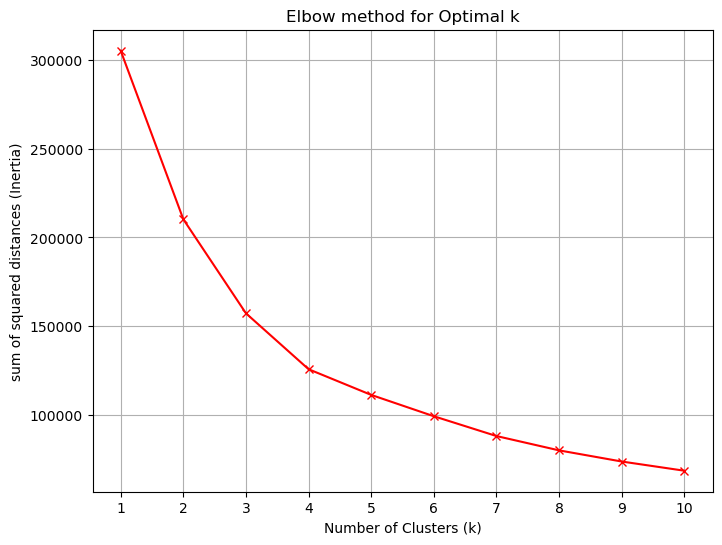

'\nThe Elbow method provides a visualization of the K-means method for sum of square distances from each point to it centroid.\nThe plot helps to see the point of diminishing returns.  After a certain point the complexity of the model will be more\nlikely to overfit the data when a more simple model would be better.  Too few though has not enough separation in the clusters\n'

In [65]:
#determine optimal number of clusters and plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_vals, inertia, marker='x', linestyle='-', color='r')
plt.xticks(k_vals)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('sum of squared distances (Inertia)')
plt.title('Elbow method for Optimal k')
plt.grid(True)
plt.show()
'''
The Elbow method provides a visualization of the K-means method for sum of square distances from each point to it centroid.
The plot helps to see the point of diminishing returns.  After a certain point the complexity of the model will be more
likely to overfit the data when a more simple model would be better.  Too few though has not enough separation in the clusters
'''

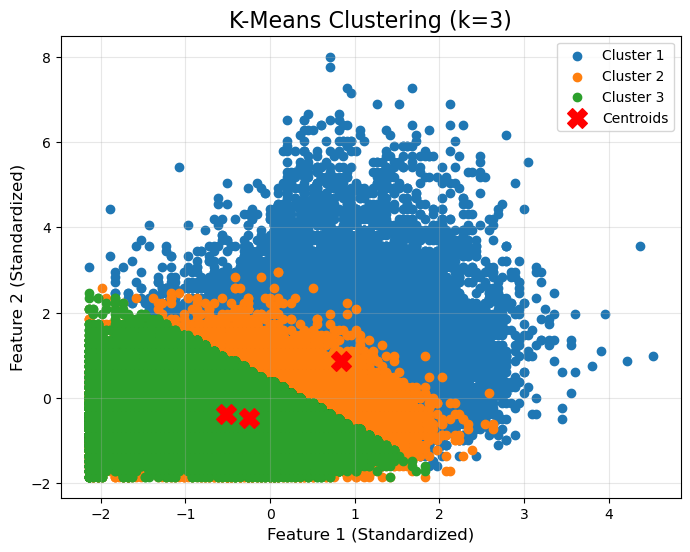

In [66]:
#choose number of clusters 3 - also trying 4
k = 3
#create a kmeans object and random state so we can reproduce.  Also fits a centroid and adjusts it to get minimum distances
kmeans = KMeans(n_clusters=k, random_state=30) 
#assigns each point to one of the clusters on the scaled dataframe
cluster_labels = kmeans.fit_predict(df_scaled)

#plot the data points with cluster label
plt.figure(figsize=(8, 6))
for cluster in range(k): #loop over each cluster
    plt.scatter(
        df_scaled[cluster_labels == cluster, 0],  #x-coords
        df_scaled[cluster_labels == cluster, 1],  #y-coords
        label=f"Cluster {cluster + 1}" #put a label for each cluster (0 - 2)
    )

#plot the centroids
centroids = kmeans.cluster_centers_ #get coords for the centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c="red", marker="X", s=200, label="Centroids" #plots color, marker and size of centroids
)

#add titles and labels
plt.title(f"K-Means Clustering (k={k})", fontsize=16)
plt.xlabel("Feature 1 (Standardized)", fontsize=12)
plt.ylabel("Feature 2 (Standardized)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3) #adds transparency
plt.show()
'''
Each point on the graph represents an observatoin and the color represents the cluster that is closest
for the observation.  